<a href="https://colab.research.google.com/github/sury1999/Data-Analysis-Projects/blob/main/Grip_Task_3_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**THE SPARKS FOUNDATION**
##**BUSINESS ANALYTICS INTERNSHIP**
##**GRIP TASK3**
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164



####**1:  The pie chart below show the region wise sales of a particular super store based in USA. From the chart we can see that the Southern region isn't doing as well as the rest of the regions and needs improvement.**

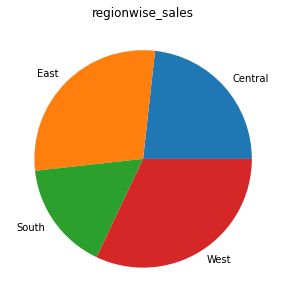

In [20]:
df.groupby('Region')['Sales'].count().plot(kind='pie', figsize=(10,5), title='regionwise sales', ylabel='')

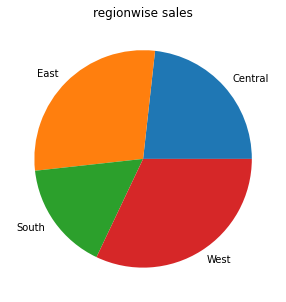

In [23]:
df.groupby('Region')['Profit'].count().plot(kind='pie', figsize=(10,5), title='regionwise sales', ylabel='')